In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Professional Plotting Configuration
%matplotlib inline
sns.set_theme(style="whitegrid", palette="viridis")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 16

# Load the cleaned dataset from the processed folder
# Path follows the project structure: data/processed/
PROCESSED_DATA_PATH = '../data/processed/cleaned_churn_data.csv'
df = pd.read_csv(PROCESSED_DATA_PATH)

print(f"Dataset Loaded: {df.shape[0]} rows and {df.shape[1]} features.")

Dataset Loaded: 9900 rows and 11 features.


/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

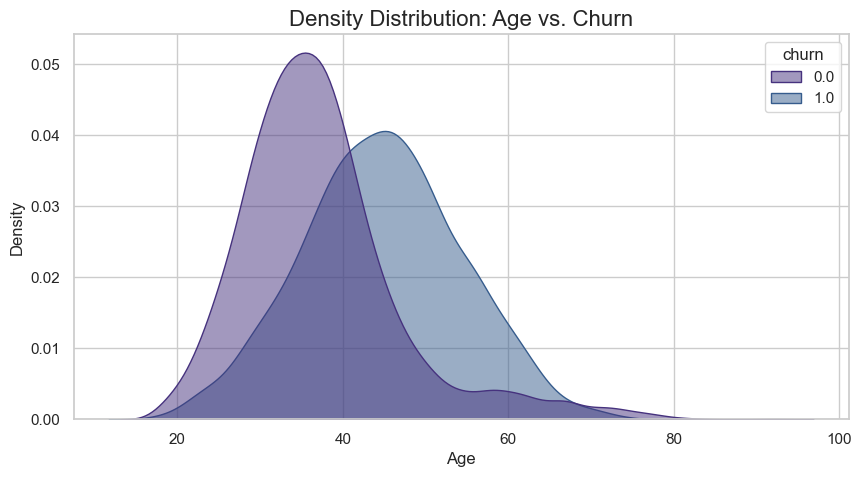

/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/ramesh/Desktop/RestConnect/venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be remov

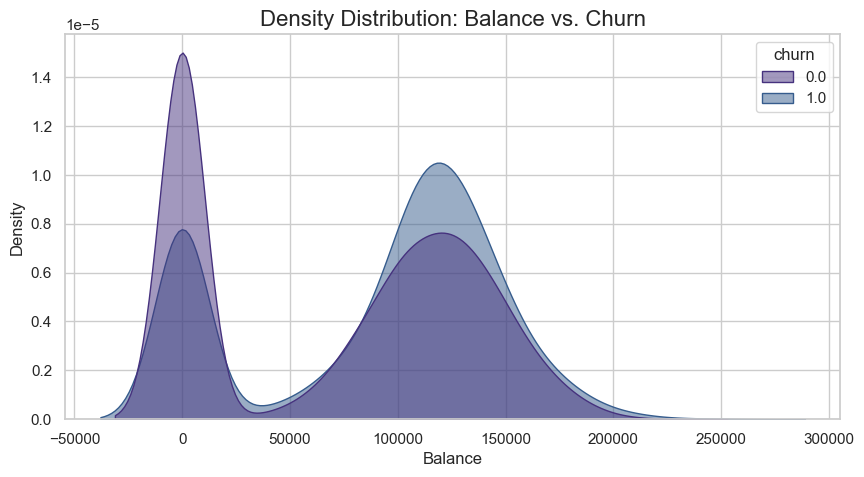

In [2]:
def plot_churn_density(df: pd.DataFrame, feature: str):
    """
    Visualizes the density of a numerical feature split by churn status.
    Helps identify ranges where churn probability is highest.
    """
    plt.figure(figsize=(10, 5))
    sns.kdeplot(data=df, x=feature, hue='churn', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Density Distribution: {feature.title()} vs. Churn')
    plt.xlabel(feature.replace('_', ' ').title())
    plt.show()

# Visualize key numerical drivers
plot_churn_density(df, 'age')
plot_churn_density(df, 'balance')

In [3]:
def engineer_financial_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Derives ratios to capture financial stability and depth of relationship.
    
    Logic: High balance-to-salary ratio indicates the bank is the primary 
    financial hub for the member.
    """
    # Create the ratio (adding 1 to denominator to avoid division by zero)
    df['balance_salary_ratio'] = df['balance'] / (df['estimated_salary'] + 1)
    
    # Identify 'Zero Balance' members as a separate behavioral segment
    df['is_zero_balance'] = (df['balance'] == 0).astype(int)
    
    print("Feature Created: balance_salary_ratio & is_zero_balance flag.")
    return df

df = engineer_financial_metrics(df)

Feature Created: balance_salary_ratio & is_zero_balance flag.


In [4]:
def engineer_loyalty_metrics(df: pd.DataFrame) -> pd.DataFrame:
    """
    Creates metrics capturing the 'velocity' and 'depth' of engagement.
    """
    # 1. Tenure-to-Age Ratio: Captures loyalty relative to life stage
    df['tenure_age_ratio'] = df['tenure'] / (df['age'] + 1)
    
    # 2. Product-Activity Score: 
    # Logic: An active member with multiple products is the 'ideal' sticky customer.
    # We multiply product count by (active_member + 1) to amplify the score for active users.
    df['engagement_score'] = df['products_number'] * (df['active_member'] + 1)
    
    print("Features Created: tenure_age_ratio & engagement_score.")
    return df

df = engineer_loyalty_metrics(df)

Features Created: tenure_age_ratio & engagement_score.


In [5]:
def apply_age_binning(df: pd.DataFrame) -> pd.DataFrame:
    """
    Segments members into life-cycle bins.
    Bins: Young Adult (18-30), Adult (31-45), Mid-Age (46-60), Senior (60+)
    """
    bins = [0, 30, 45, 60, 120]
    labels = ['Young_Adult', 'Adult', 'Mid_Age', 'Senior']
    
    df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
    
    # Perform One-Hot Encoding for the bins to prepare for ML
    df = pd.get_dummies(df, columns=['age_group'], prefix='grp', drop_first=True)
    
    print("Age Segmentation (Binning) Applied.")
    return df

df = apply_age_binning(df)

Age Segmentation (Binning) Applied.


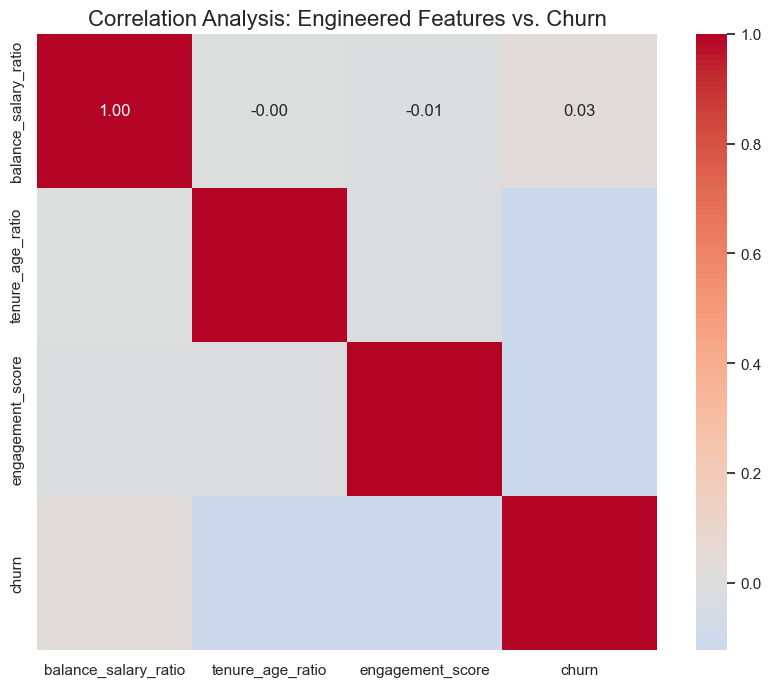

In [6]:
# Select the new features and the target
engineered_cols = ['balance_salary_ratio', 'tenure_age_ratio', 'engagement_score', 'churn']

plt.figure(figsize=(10, 8))
corr = df[engineered_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', center=0)
plt.title('Correlation Analysis: Engineered Features vs. Churn')
plt.show()

In [7]:
# Review the final feature set
print("Final Features available for Modeling:")
print(list(df.columns))

# Export to the processed data folder
FINAL_OUTPUT_PATH = '../data/processed/final_feature_set.csv'
df.to_csv(FINAL_OUTPUT_PATH, index=False)

print("-" * 30)
print(f"FEATURE ENGINEERING COMPLETE")
print(f"Artifact Saved: {FINAL_OUTPUT_PATH}")
print("-" * 30)

Final Features available for Modeling:
['credit_score', 'country', 'gender', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn', 'balance_salary_ratio', 'is_zero_balance', 'tenure_age_ratio', 'engagement_score', 'grp_Adult', 'grp_Mid_Age', 'grp_Senior']
------------------------------
FEATURE ENGINEERING COMPLETE
Artifact Saved: ../data/processed/final_feature_set.csv
------------------------------
